# Ch.3 - 평가

## 정확도(Accuracy) = (예측 결과가 동일한 데이터 건수) / (전체 예측 데이터 건수)

In [52]:
from sklearn.base import BaseEstimator
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [53]:
def encode_features(dataDF):
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    return dataDF


In [54]:
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

In [55]:
# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis = 1, inplace = True)
    return df

In [56]:
# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

In [57]:
# 앞에서 설정한 데이터 전처리 함수 도출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [58]:
# BaseEstimator를 Overwriting 하여 원하는대로 조절
class MyDummyClassifier(BaseEstimator):
    # fit() 메서드는 아무것도 학습하지 않음.
    def fit(self,x,y=None):
        pass
    
    # predict() 메서드는 단순히 Sex feature가 1이면 0, 그렇지 않으면 1로 예측함.
    def predict(self,X):
        pred = np.zeros((X.shape[0],1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else :
                pred[i] = 1
        return pred

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [60]:
# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할.
titanic_df = pd.read_csv('./data/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis = 1)
X_titanic_df = transform_features(X_titanic_df)
X_train,X_test,y_train, y_test = train_test_split(X_titanic_df,y_titanic_df,test_size = 0.2, random_state = 0)

# 위에서 생성한 Dummy Classfier를 이용해 학습/예측/평가 수행.
myclf = MyDummyClassifier()
myclf.fit(X_train,y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는 : {0:.4f}'.format(accuracy_score(y_test,mypredictions)))

Dummy Classifier의 정확도는 : 0.7877


## MNIST 손글씨 "Is it seven?"

In [14]:
from sklearn.datasets import load_digits
import numpy as np

class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass
    
    #입력 값으로 들어오는 X 데이터 세트의 크기만큼 모두 0 값으로 만들어서 반환
    
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)
    
# 사이킷런의 내장 데이터 세트인 load_digits()을 이용해 MNIST 데이터 로딩
digits = load_digits()

# digits 번호가 7번이면 True이고 이를 astype(intn)로 1로 변환, 7번이 아니면 False이고 0으로 변환.

y = (digits.target == 7).astype(int)
X_train, X_test, y_train,y_test = train_test_split(digits.data,y,random_state = 11)

In [16]:
print('레이블 테스트 세트 크기 :' , y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

레이블 테스트 세트 크기 : (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
dtype: int64


In [17]:
# Dummy Classifier로 학습/예측/정확도 평가.
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train,y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는 : {:.3f}'.format(accuracy_score(y_test,fakepred)))

모든 예측을 0으로 하여도 정확도는 : 0.900


### Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

In [22]:
import sklearn.metrics as skm
skm.confusion_matrix(y_test,fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

### 정밀도(Precision)와 재현율(Recall)

In [25]:
from sklearn.metrics import recall_score, precision_score

def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    print('오차행렬')
    print(confusion)
    print('정확도 : {0:.4f},정밀도: {1:.4f}, 재현율 : {2:.4f}'.format(accuracy,precision,recall))

In [63]:
from sklearn.linear_model import LogisticRegression

# 원본데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할.
titanic_df = pd.read_csv('./data/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis =1 )
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train,y_test = train_test_split(X_titanic_df,y_titanic_df,
                                                   test_size=0.20,random_state = 11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test,pred)


오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492,정밀도: 0.7742, 재현율 : 0.7869


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [66]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba() 결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:',pred_proba[:3])

# 예측확률 array와 예측 결과값 array를 병합 (concatenate)해 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba,pred.reshape(-1,1)],axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n' , pred_proba_result[:3])

pred_proba() 결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.46198236 0.53801764]
 [0.87868775 0.12131225]
 [0.8771637  0.1228363 ]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.46198236 0.53801764 1.        ]
 [0.87868775 0.12131225 0.        ]
 [0.8771637  0.1228363  0.        ]]


In [68]:
from sklearn.preprocessing import Binarizer

# Binaizer의 threshold 설정값. 분류 결정 임곗값임

custom_threshold = 0.5

# predict_proba() 반환값의 두 번째 칼럼, 즉 positive 클래스 칼럼 하나만 추출해 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test,custom_predict)

오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492,정밀도: 0.7742, 재현율 : 0.7869


In [69]:
# Binarizer의 threshold의 설정값을 0.4로 설정. 즉 분류 결정 임계값을 0.5에서 0.4로 낮춤
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test,custom_predict)

오차행렬
[[98 20]
 [10 51]]
정확도 : 0.8324,정밀도: 0.7183, 재현율 : 0.8361


In [70]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test,pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7805


In [132]:
def get_eval_by_threshold(y_test,pred_proba_c1,thresholds):
    # thersholds list객체 내의 값을 차례로 iteration하면서Evaluation수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값 :',custom_threshold)
        get_clf_eval(y_test,custom_predict)

In [75]:
def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    # F1 스코어 추가
    f1 = f1_score(y_test,pred)
    print('오차행렬')
    print(confusion)
    print('정확도 : {0:.4f},정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1 : {3:.4f}'.format(accuracy,precision,recall,f1))
    
thresholds = [0.4,0.45,0.5,0.55,0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

임계값 : 0.4
오차행렬
[[98 20]
 [10 51]]
정확도 : 0.8324,정밀도 : 0.7183, 재현율 : 0.8361, F1 : 0.7727
임계값 : 0.45
오차행렬
[[103  15]
 [ 12  49]]
정확도 : 0.8492,정밀도 : 0.7656, 재현율 : 0.8033, F1 : 0.7840
임계값 : 0.5
오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492,정밀도 : 0.7742, 재현율 : 0.7869, F1 : 0.7805
임계값 : 0.55
오차행렬
[[109   9]
 [ 15  46]]
정확도 : 0.8659,정밀도 : 0.8364, 재현율 : 0.7541, F1 : 0.7931
임계값 : 0.6
오차행렬
[[112   6]
 [ 16  45]]
정확도 : 0.8771,정밀도 : 0.8824, 재현율 : 0.7377, F1 : 0.8036


## ROC 곡선과 AUC(Area Under the Curve)

In [76]:
# TPR(True Positive Rate) = 재현률 or 민감도(Sensitivity)
# FPR(False Positive Rate) = FP / (FP + TN) = 1 - TNR = 1 - 특이성
# TNR(True Negative Rate) = TN / (FP + TN)

In [78]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_prova_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs,tprs,thresholds = roc_curve(y_test, pred_prova_class1)

#반환된 임계값 배열 로우가 47건이므로 샘플로 10건만 추출하되, 임곗값을 5 step으로 추출.
#thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작.

thr_index = np.arange(1, thresholds.shape[0],5)
print('샘플 추출을 위한 임계값 배열의 index 10개 :', thr_index)
print('샘플용 10개의 임계값 : ',np.round(thresholds[thr_index],2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임계값 별 FPR : ',np.round(fprs[thr_index],3))
print('샘플 임계값 별 TPR : ',np.round(tprs[thr_index],3))

샘플 추출을 위한 임계값 배열의 index 10개 : [ 1  6 11 16 21 26 31 36 41 46 51]
샘플용 10개의 임계값 :  [0.97 0.65 0.63 0.56 0.45 0.4  0.35 0.15 0.13 0.11 0.11]
샘플 임계값 별 FPR :  [0.    0.017 0.034 0.076 0.127 0.169 0.203 0.466 0.585 0.686 0.797]
샘플 임계값 별 TPR :  [0.033 0.639 0.721 0.754 0.803 0.836 0.885 0.902 0.934 0.967 0.984]


In [87]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

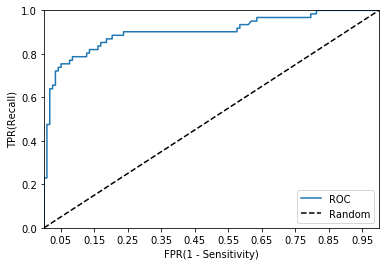

In [86]:
def roc_curve_plot(y_test,pred_proba_c1):
    #임계값에 따른 FPR,TPR값을 반환 받음/
    fprs,tprs,thresholds = roc_curve(y_test,pred_proba_c1)
    
    #ROC곡선을 그래프 곡선으로 그림.
    plt.plot(fprs,tprs,label='ROC')
    #가운데 대각선 직선을 그림.
    plt.plot([0,1],[0,1], 'k--',label = 'Random')
    
    #FPR X 축의 Scale을0.1 단위로 변경, X, Y 축 명 설정등
    
    start ,end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1 - Sensitivity)');plt.ylabel('TPR(Recall)')
    plt.legend()
    
roc_curve_plot(y_test,pred_proba[:,1])

In [96]:
from sklearn.metrics import roc_auc_score

print(confusion_matrix(y_target,preds))
print('정확도 : ',np.round(accuracy_score(y_target,preds),4))
print('정밀도 : ',np.round(precision_score(y_target,preds),4))
print('재현율 : ',np.round(recall_score(y_target,preds),4))

NameError: name 'y_target' is not defined

In [99]:
def get_clf_eval(y_test,pred = None , pred_proba = None):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test,pred_proba)
    print('오차행렬')
    print(confusion)
    print('정확도 : {0:.4f},정밀도 : {1:.4f}, 재현율 : {2:.4f},\
    F1 : {3:.4f}, AUC : {4:.4f}'.format(accuracy,precision,recall,f1,roc_auc))

In [117]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions,recalls,thresholds = precision_recall_curve(y_test,pred_proba_c1)
    
    # X 축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    
    plt.figure(figsize=(8,6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds,precisions[0:thresholds_boundary], linestyle='--',label = 'precision')
    plt.plot(thresholds,recalls[0:thresholds_boundary],label='recall')
    
    # threshold 값  X 축의 Scale을 0.1 단위로 변경
    start ,end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    # X축, Y축 label과 legend 그리고 grid 설정
    plt.xlabel('Threshold value');plt.ylabel('Precision and Recall value')
    plt.legend();plt.grid()
    plt.show()

In [107]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve,roc_curve,f1_score,confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score , roc_auc_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [108]:
diabets_data = pd.read_csv('./data/diabetes.csv')
print(diabets_data['Outcome'].value_counts())
diabets_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [109]:
diabets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [110]:
# 피처 데이터 세트 x, 레이블 데이터 세트 yfmf 추출.
# 맨 끝이 Outcome 칼럼으로 레이블 값임. 칼럼 위치 -1을 이용해 추출
X = diabets_data.iloc[:, :-1]
y = diabets_data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2 , random_state=156,stratify =y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test,pred,pred_proba)

오차행렬
[[88 12]
 [23 31]]
정확도 : 0.7727,정밀도 : 0.7209, 재현율 : 0.5741,    F1 : 0.6392, AUC : 0.7919


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


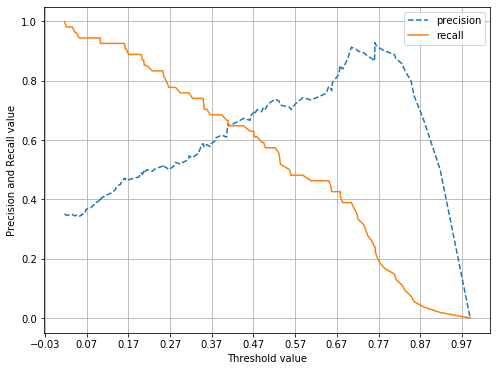

In [118]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test,pred_proba_c1)

In [119]:
diabets_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

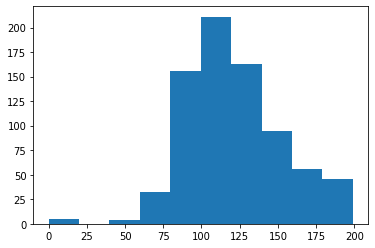

In [121]:
plt.hist(diabets_data['Glucose'],bins=10)

In [123]:
# 0 값을 검사할 피처 명 리스트
zero_features = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

# 전체 데이터 건수
total_count = diabets_data['Glucose'].count()

# 피처별로 반복하면서 데이터 값이 0인 데이터 건수를 추출하고, 퍼센트 계산
for feature in zero_features:
    zero_count  = diabets_data[diabets_data[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature,zero_count,100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 35, 퍼센트는 4.56 %
SkinThickness 0 건수는 227, 퍼센트는 29.56 %
Insulin 0 건수는 374, 퍼센트는 48.70 %
BMI 0 건수는 11, 퍼센트는 1.43 %


In [124]:
# zero_feature 리스트 내브에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체
mean_zero_features = diabets_data[zero_features].mean()
diabets_data[zero_features]= diabets_data[zero_features].replace(0,mean_zero_features)

In [129]:
x = diabets_data.iloc[:,:-1]
y = diabets_data.iloc[:,-1]

# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size = 0.2 , random_state=156,stratify =y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test,pred,pred_proba)

오차행렬
[[90 10]
 [21 33]]
정확도 : 0.7987,정밀도 : 0.7674, 재현율 : 0.6111,    F1 : 0.6804, AUC : 0.8059


In [135]:
thresholds = [0.3,0.33,0.36,0.39,0.42,0.45,0.48,0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

임계값 : 0.3


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [134]:
# 임계값을 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold=0.48)

#위에서 구한 lr_clf의 predict_proba() 예측 확률 array에서 1에 해당하는 칼럼값을 Binarizer변환.
pred_th_048 = binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))

get_clf_eval(y_test,pred_th_048,pred_proba[:,1])

오차행렬
[[88 12]
 [21 33]]
정확도 : 0.7857,정밀도 : 0.7333, 재현율 : 0.6111,    F1 : 0.6667, AUC : 0.8059
